In [1]:
from appgeopy import *
from my_packages import *

In [2]:
# output_fpath = r"D:\SharedFolder\MiaplPy_Sample\Miami_Sentinel1_data\miaplpy\inverted\phase_series.h5"
# output_fpath = r"D:\SharedFolder\ISCE_Mintpy\S1A_Run002\s1a_miaplpy_v2\inverted\phase_series.h5"
output_fpath = r"D:\SharedFolder\ISCE_Mintpy\TSX_Run013\miaplpy013_v1\inverted\phase_series.h5"

# Extract existing data and metadata
with h5py.File(output_fpath, "r") as hdf5_file:
    existing_data_dict = gwatertools.h5pytools.hdf5_to_data_dict(hdf5_file)

In [3]:
existing_data_dict.keys()

dict_keys(['amplitude', 'bperp', 'date', 'phase', 'shp', 'temporalCoherence'])

In [4]:
# Statistically Homogeneous Pixels
shp_arr = existing_data_dict["shp"]

# temporal coherence
tempcoh_arr = existing_data_dict["temporalCoherence"]
avgtempcoh_arr = tempcoh_arr[0]

# extract SHPs whose average temporal coherence larger than 0.9
highcoh_shp_arr = np.ma.masked_where(avgtempcoh_arr <= 0.6, shp_arr)
# highcoh_shp_arr.count() * 100 / highcoh_shp_arr.size

9.545196936838625

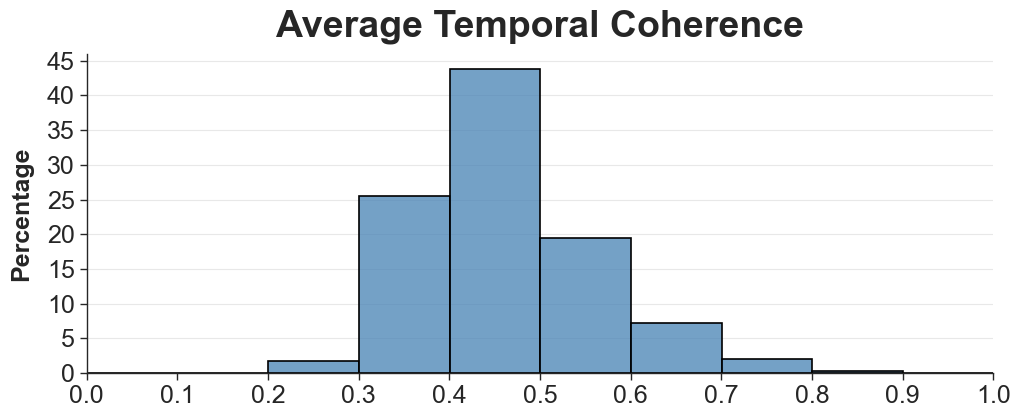

In [33]:
fig = plt.figure(figsize=(11.7, 8.3 * 1 / 2))
sns.set_theme(context="paper", style="ticks", palette="deep", font="sans-serif", font_scale=1.5)
ax = fig.add_subplot(111)
sns.histplot(
    avgtempcoh_arr.flatten(),
    kde=False,
    bins=10,
    color="steelblue",
    stat="percent",
    edgecolor="black",
    linewidth=1.2,
    ax=ax,
)
ax.set_xlim(0, 1)
ax.grid(color="lightgray", axis="y", alpha=0.5)
ax.set_axisbelow(True)
visualize.configure_axis(ax, hide_spines=["top", "right"], tick_direction="out", title="Average Temporal Coherence")
ax.set_ylabel("Percentage", fontweight="bold", labelpad=10)
visualize.configure_ticks(ax, x_major_interval=0.1, y_major_interval=5)
# visualize.save_figure(fig, savepath="avgtempcoh_histogram.png", dpi=600)
plt.show()

0.6 289351 3031378
0.65 151331 3031378
0.7 69880 3031378
0.75 27795 3031378
0.8 9407 3031378
0.85 2884 3031378
0.9 634 3031378
0.95 75 3031378


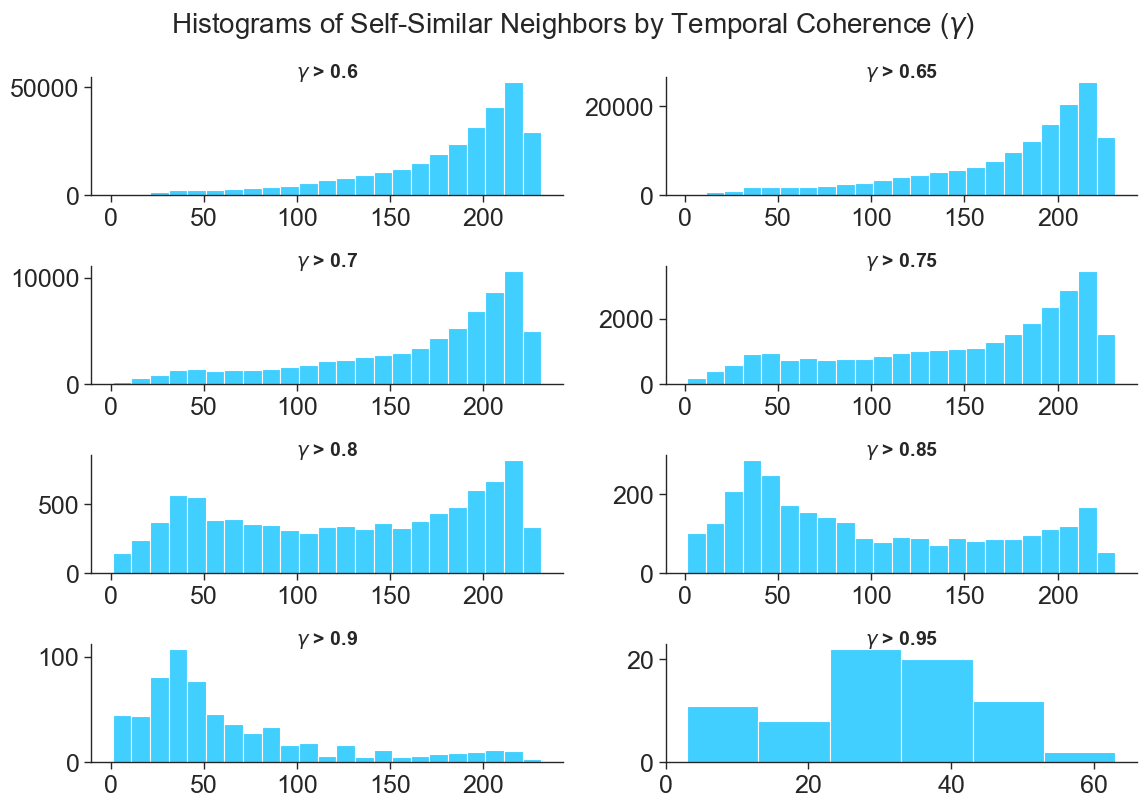

In [72]:
# Define the figure with 3 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(11.7, 8.3))
fig.suptitle(r"Histograms of Self-Similar Neighbors by Temporal Coherence ($\gamma$)", fontsize=20, y=0.975)

# List of thresholds to iterate over
thresholds = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

# Iterate over thresholds and subplots
for idx, threshold in enumerate(thresholds):
    # Calculate the masked array for the current threshold
    highcoh_shp_arr = np.ma.masked_where(avgtempcoh_arr <= threshold, shp_arr)
    print(threshold, highcoh_shp_arr.count(), highcoh_shp_arr.size)

    # Flatten to 1D for histogram plotting, only take unmasked values
    data = highcoh_shp_arr.compressed()

    # Determine the row and column index for the current subplot
    row, col = divmod(idx, 2)
    ax = axes[row, col]

    # Plot the histogram for the current threshold
    sns.histplot(data, binwidth=10, kde=False, ax=ax, color="deepskyblue", stat='count')
    visualize.configure_axis(ax, hide_spines=["top", "right"], tick_direction="out")
    ax.set_title(r"$\gamma$" + f" > {threshold}", fontweight='bold', fontsize=14, y=0.925)

# Adjust layout for better readability
fig.tight_layout()#rect=[0, 0.03, 1, 0.95]
# visualize.save_figure(fig, savepath='SHP_histograms.png', dpi=600)
plt.show()